# Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:**

Выявить потенциально популярный продукт и спланировать рекламные кампании на 2017 год, основываясь на данных о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы:**

1.  Подготовить данные.
2.  Провести исследовательский анализ данных.
3.  Составить портрет пользователя каждого региона (NA, EU, JP).
4.  Проверить гипотезы.

# Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод.** Всего в данных 16715 строк. Есть пропуски в нескольких столбцах. Тип данных соответствует, за исключение столбца Year_of_Release, тип данных float вместо int, и User_Score, в котором тип object вместо float. Название столбцов имеют разный регистр.

# Шаг 2. Подготовим данные.

##  Заменим названия столбцов (приведем к нижнему регистру).

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Обработаем пропуски и тип данных. Выведем количество пропусков и их долю в процентах.

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
pd.DataFrame(df.isna().mean()*100)

,0
name,0.011965
platform,0.000000
year_of_release,1.609333
genre,0.011965
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319174
user_score,40.089740


В столбце name и genre всего по 2 пропуска, для количества 16715 строк это маленький процент данных. Данные не заполнены, возможно, из-за человеческого фактора либо при переносе данных произошел технический сбой. 

В столбце year_of_release 269 пропусков, что составляет 1,6 % от всех данных. Возможно данные утеряны из-за технической ошибки. Логически заполнить данные невозможно, проверять каждую строку и искать год выпуска, слишком трудоемко.

Удалим пропуски во всех трех столбцах. 

In [8]:
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

После удаления пропусков поменям тип данных в столбце year_of_release на int.

In [9]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


В столбце critic_score пропусков больше 50%. Возможно данные утеряны из-за технической ошибки. Логически заполнить оценку критиков невозможно, заполнить средним значением или медианой будет не верно. Оставим пропуски.

В столбце user_score пропусков 40%. Возможно данные утеряны из-за технической ошибки. Как мы ранее проверяли, тип данных в этом столбце почему-то object. Проверим значения. 

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
df.query('user_score == "tbd"').shape

(2376, 11)

Как мы видим, помимо пропусков в столбце есть оценка tbd(to be determined)  в количестве 2424 строк, означающая, что оценка еще не определена. Такую оценку можно приравнять к отсутствию значения, то есть пропуск. Заполним tbd значением Nan, с указанием типа данных Float. Остальные имеющиеся пропуски оставим как есть. 

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float')
df.query('user_score == "tbd"').shape

(0, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь тип данных в столбцах year_of_release и user_score int и float соответственно.

Столбец rating имеет 40,5% пропусков, предположительно тоже из-за технической ошибки. Проверим уникальные значения столбца.

In [14]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Столбец rating содержит буквенное обозначение рейтинга, присвоенного видеоигре организацией ESRB.

Согласно интернету буквенные обозначения рейтинга означают:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех» 
- «E10+»(«Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M»(«Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- "K-A" ("Kids to Adults") - первоначально использовался для «E» («Everyone»)

Как видим, буквенные обозначения относятся к возрастной категории. Заполним пропуски Unk (Unknown)- неизвестно.

In [15]:
df['rating'] = df['rating'].fillna('Unk')
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Проверим, как выглядит теперь таблица.

In [16]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unk
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unk


## Проверим явные и неявные дубликаты.

In [17]:
df.duplicated().sum()

0

In [18]:
df.duplicated().value_counts()

False    16444
dtype: int64

In [19]:
df['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [20]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [22]:
df.duplicated(subset=['name','platform','year_of_release']).sum()

1

In [23]:
display(df[df.duplicated(subset=['name','platform','year_of_release'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Выявили один неявный дубликат. Проверим по названию, выведя все строки с данной игрой. 

In [24]:
df.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Да, действительно, строка 16230 дубликат строки 604. Удалим дубликат.

In [25]:
df = df.drop_duplicates(subset=['name','platform','year_of_release'])

In [26]:
df.duplicated(subset=['name','platform','year_of_release']).sum()

0

Явных дубликатов нет. Выявили и удалили один неявный дубликат.

## Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [27]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unk,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unk,31.38


**Вывод.** На данном этапе изменили регистр названий столбцов, удалили пропуски в строках name, genre и year_of_release. Изменили типы данных в year_of_release и user_score, проверили наличие дубликатов.

# Шаг 3. Проведем исследовательский анализ данных

## Посмотрим, сколько игр выпускалось в разные годы.

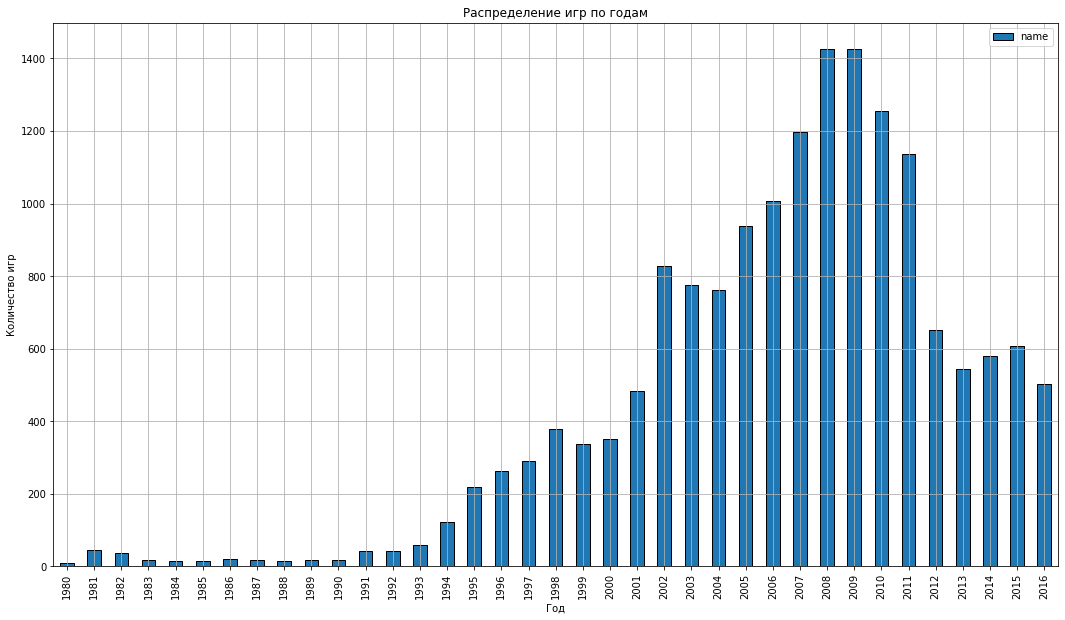

In [28]:
df.pivot_table(
    index='year_of_release',
    values='name',
    aggfunc='count').plot(
    kind='bar',
    figsize=(18, 10),
    ec='black',
    grid=True
);

plt.title('Распределение игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

In [29]:
df['year_of_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

По данным мы видим, что совсем мало игр выпускалось вплоть до 1995 года. Далее игр выпускают с каждым годом все больше, пик приходится на 2008-2009 года, затем спад почти в 2 раза, начиная с 2012 года. Можно считать, что данные до 1995 не показательны и для анализа не так важны, так как игр мало и качество их было значительно ниже современных игр. 

## Проверим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постром распределение по годам. Проверим, за какой характерный срок появляются новые и исчезают старые платформы.

In [30]:
platform_sales = df.pivot_table(
                        index='platform',
                        values='total_sales',
                        aggfunc='sum').sort_values(by='total_sales',
                            ascending =False) 

platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


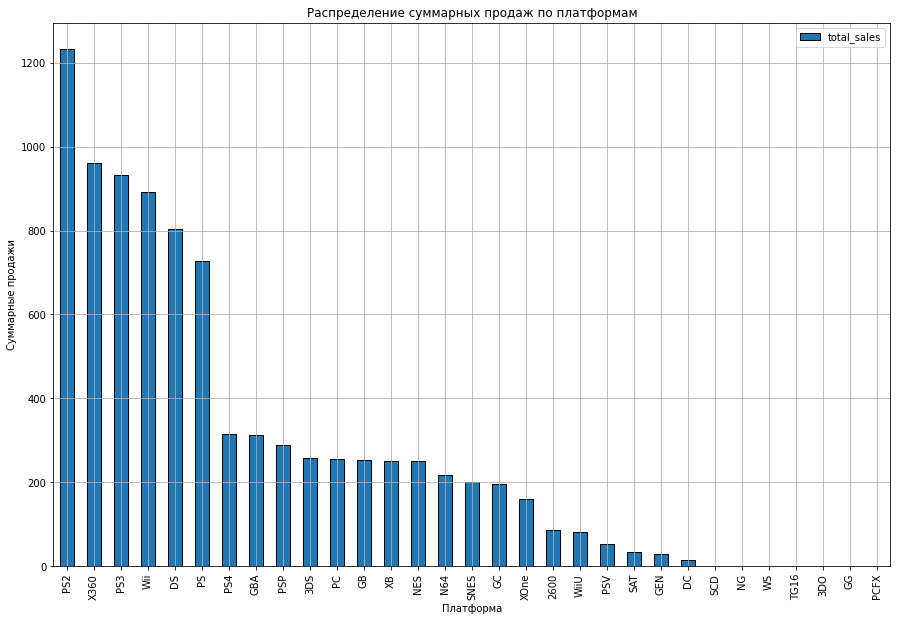

In [31]:
platform_sales.plot.bar(figsize=(15, 10), ec='black', grid=True)
plt.title('Распределение суммарных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

Как мы видим, самыми популярными по суммарных продажам являются первые 6 платформ. По ним и построим распределение по годам.

In [32]:
top_platform = df.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]')

In [33]:
top_platform = top_platform.pivot_table(
                                 index='year_of_release',
                                 columns='platform',
                                 values='total_sales',
                                 aggfunc='sum'
)

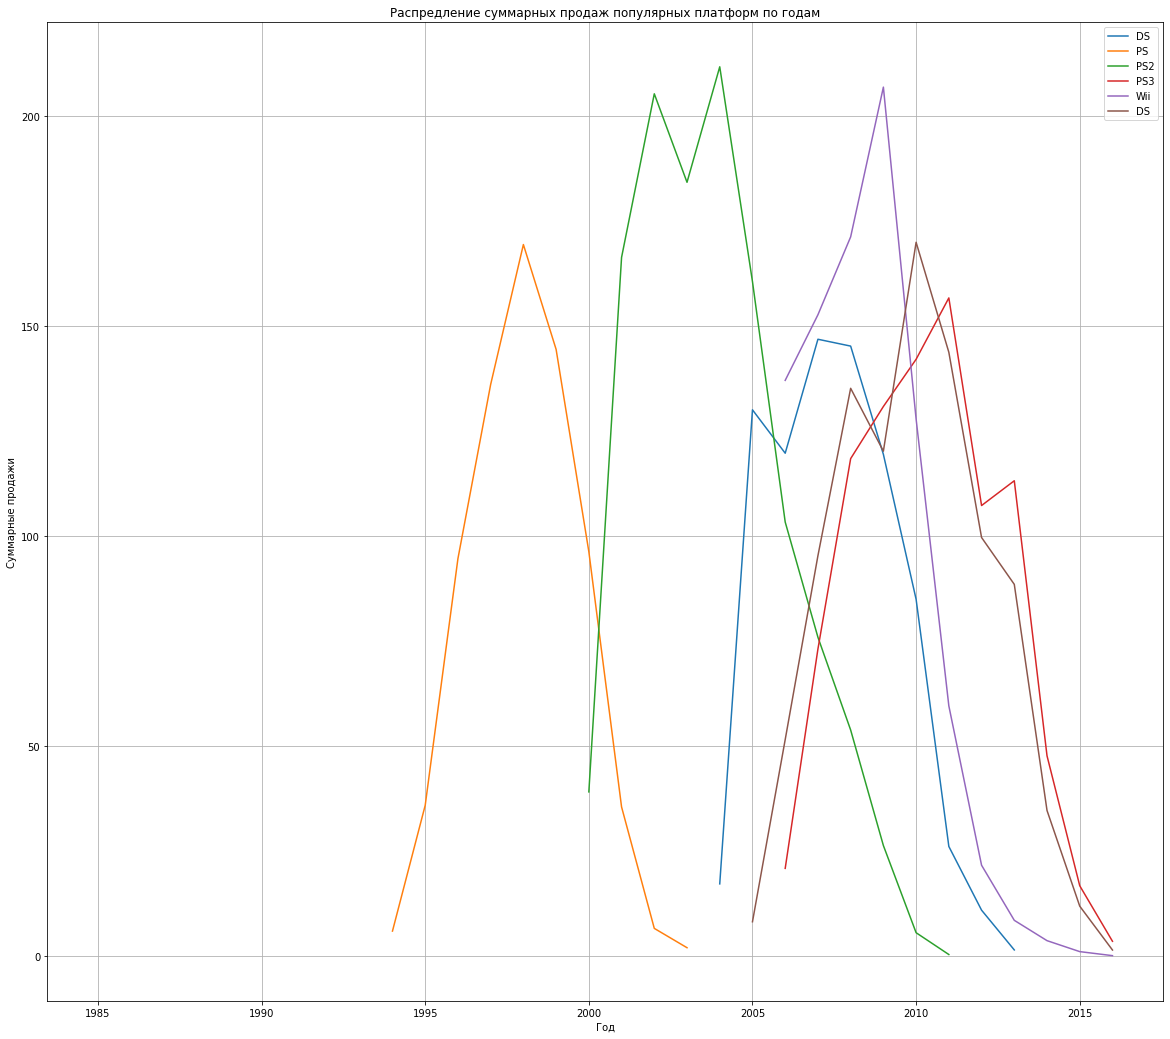

In [34]:
top_platform.plot(figsize=(20, 18), grid=True)
plt.legend(["DS", "PS", "PS2", "PS3","Wii","DS","PS"])
plt.title('Распредление суммарных продаж популярных платформ по годам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

Из графиков можно сделать вывод, что каждая платформа популярна примерно 10 лет. Пик популярности наступает через 5 лет после выхода платформы, далее наблюдается спад, так как пользователи, вероятно, переходят на новую, более совершенную платформу. В период с 2005 по 2015 появилось сразу 4 платформы, пик популярности которых приходился на период с 2008 по 2013 года. К 2015 году произошел спад популярности всех платформ. Выходит, что для прогноза в такоей динамично меняющейся индустрии, как компьютерные игры, нужно брать период за последние 2-3 года, так как давно вышедшие платформы теряют свою популярность, а новые наоборот набирают популярность. 

## Возьмем данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год.

С учетом того, что данные за 2016 год не полные, возьмем данные, начиная с 2013 года.

In [35]:
actual_data_2013 = df[df['year_of_release'] >= 2013]
actual_data_2013['platform'].unique()


array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Количество платформ заметно уменьшилось.

## Проверим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [36]:
actual_platform_sales = (actual_data_2013.pivot_table(
                                 index='platform', 
                                 values='total_sales',
                                 aggfunc='sum').
                         sort_values('total_sales', ascending=False)
                        )
actual_platform_sales

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


С 2013 года самыми прибыльными платформами были PS4, PS3, X360. Проверим, какие платформы сейчас растут, какие падают в продажах.

In [37]:
actual_platform_sales = (actual_data_2013.pivot_table(
                                 index=['platform', 'year_of_release'],
                                 values='total_sales',
                                 aggfunc='sum').
                         sort_values('platform', ascending=False)
                        )
actual_platform_sales

total_sales
platform year_of_release             
XOne     2016                   26.15
         2015                   60.14
         2014                   54.07
         2013                   18.96
X360     2016                    1.52
         2015                   11.96
         2014                   34.74
         2013                   88.58
WiiU     2014                   22.03
         2013                   21.65
         2016                    4.60
         2015                   16.35
Wii      2016                    0.18
         2015                    1.14
         2014                    3.75
         2013                    8.59
PSV      2014                   11.90
         2016                    4.25
         2015                    6.25
         2013                   10.59
PSP      2015                    0.12
         2014                    0.24
         2013                    3.14
PS4      2016                   69.25
         2015                  118.90
         2014                  100.00
         2013                   25.99
PS3      2014                   47.76
         2013                  113.25
         2016                    3.60
         2015                   16.82
PC       2016                    5.25
         2015                    8.52
         2014                   13.28
         2013                   12.38
DS       2013                    1.54
3DS      2015                   27.78
         2014                   43.76
         2016                   15.14
         2013                   56.57

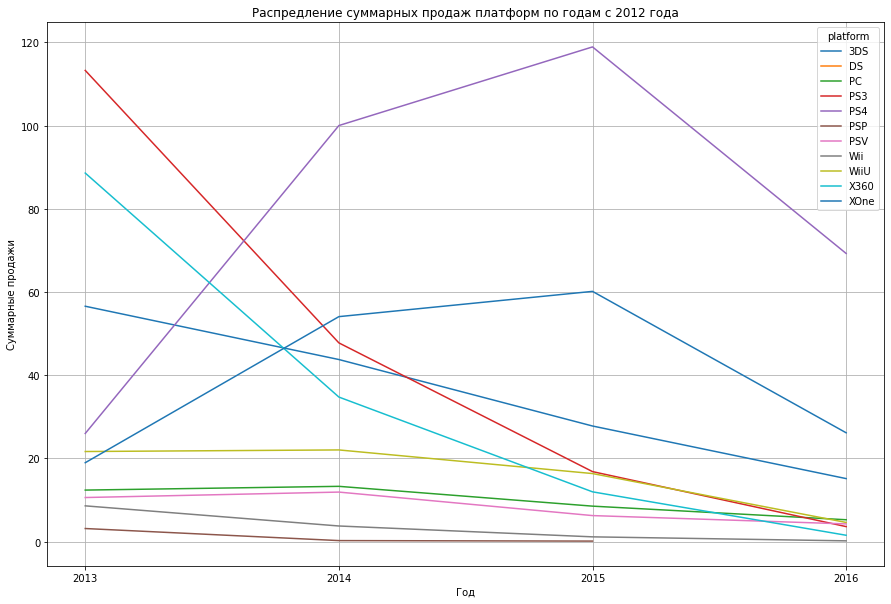

In [38]:
actual_platform_sales = actual_data_2013.pivot_table(
                                 index='year_of_release', 
                                 columns='platform',
                                 values='total_sales',
                                 aggfunc='sum')

actual_platform_sales.plot(figsize =(15,10), grid=True)
plt.title('Распредление суммарных продаж платформ по годам с 2012 года')
plt.xticks(np.arange(2013, 2017))
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.show()

Практически все платформы падают в продажах, некоторые их них не приносят прибыль совсем. Есть только 2 платформы, которые потенциально могут принести прибыль, несмотря на то, что пик продаж уже был. Это платформы PS4 и XOne.

## Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Проверим график с выбросами и без.

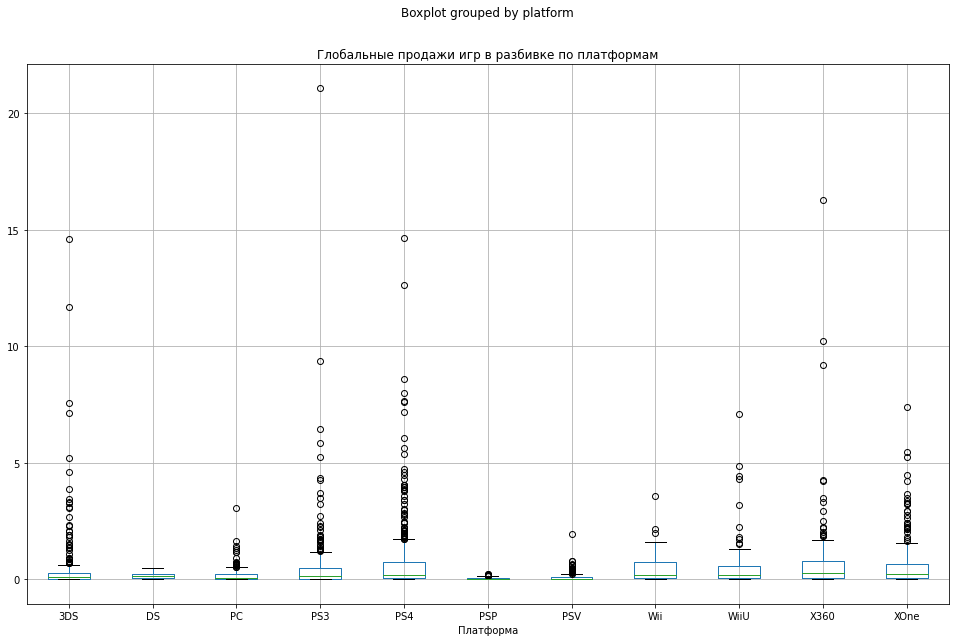

In [39]:
actual_data_2013.boxplot(column='total_sales', by='platform', figsize=(16, 10))
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.show()

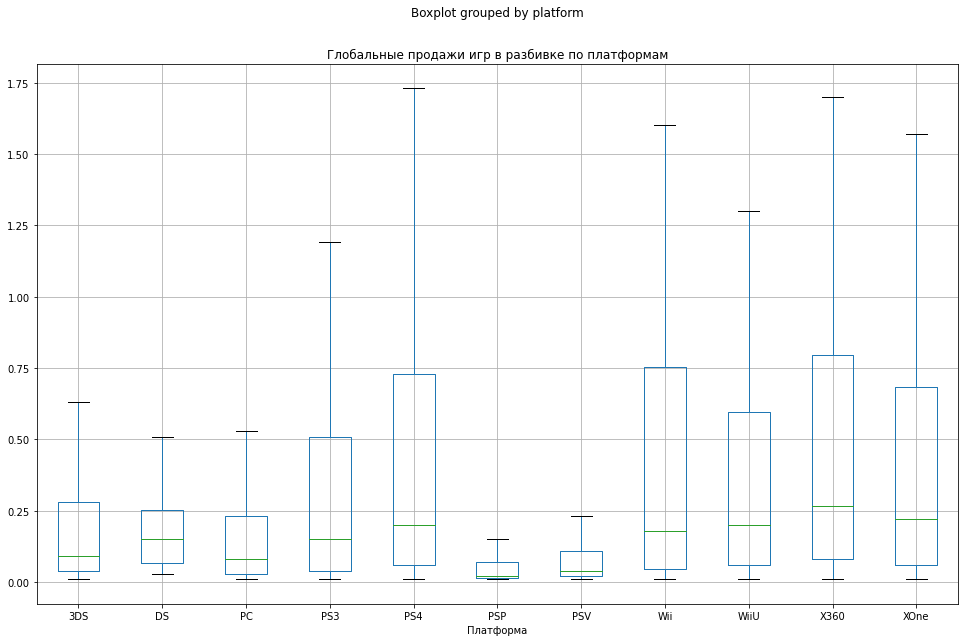

In [40]:
actual_data_2013.boxplot(column='total_sales', by='platform', showfliers=False, figsize=(16, 10))
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.show()

По графику с выбросами мы видим, что почти у всех платформ были особо популярные игры, продажи которых выходят далеко за средние показатели продаж. 
По графику без выбросов есть разброс по первому и третьему квартилю. Медианное значение примерно одинаковое у платформ PS4, WiiU, XOne.

## Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Возьмем платформу PS4.

In [41]:
ps4_platform = actual_data_2013.query(
    'platform == "PS4"')

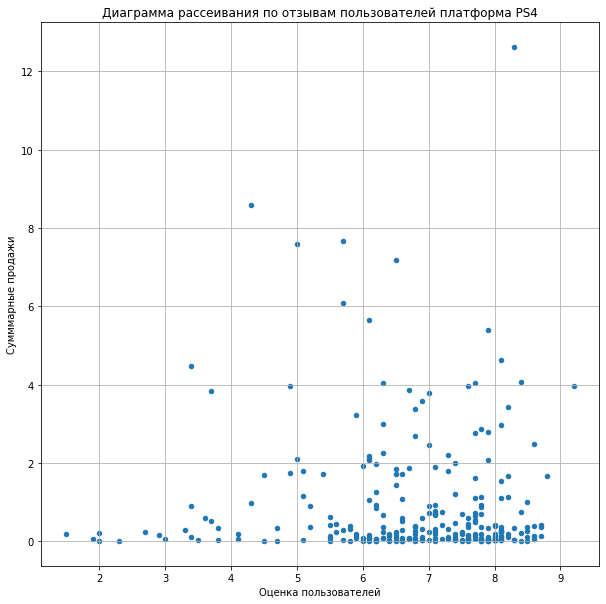

In [42]:
ps4_platform.plot(
    x='user_score', y='total_sales',
    kind='scatter', figsize=(10,10),
    legend=True, grid=True,
);

plt.title('Диаграмма рассеивания по отзывам пользователей платформа PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумммарные продажи')
plt.show()

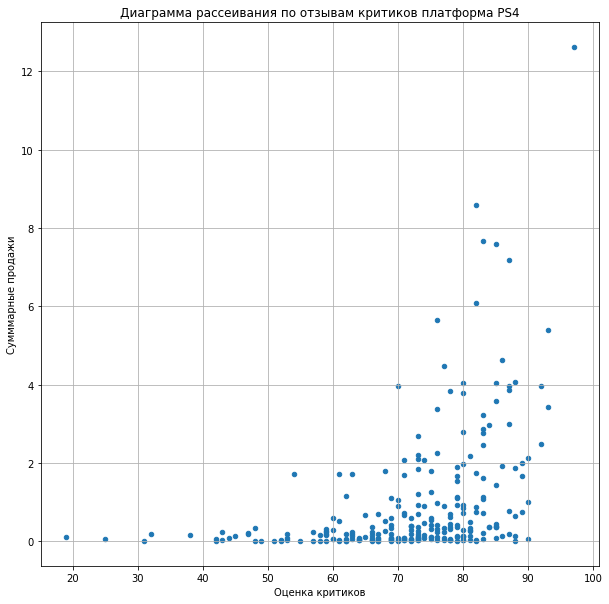

In [43]:
ps4_platform.query(
    'platform == "PS4"').plot(
    x='critic_score', y='total_sales',
    kind='scatter', figsize=(10,10),
    legend=True, grid=True,
);

plt.title('Диаграмма рассеивания по отзывам критиков платформа PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумммарные продажи')
plt.show()

In [44]:
ps4_platform[['user_score','critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


Как мы видим, оценка пользователей не влияет на продажи, корреляция отрицательная. Оценка критиков влияет, но совсем слабо. 

Соотнесем вывод с продажами игр на других платформах. Возьмем еще две платофрмы PS3, X360, суммарные продажи которых были в топе, начиная с 2013 года, а также возьмем платформу XOne, которую отобрали как потенциально прибыльную.

In [45]:
ps3_platform = actual_data_2013.query(
    'platform == "PS3"')
ps3_platform[[
    'user_score',
    'critic_score',
    'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.599920,0.002394
critic_score,0.599920,1.000000,0.334285
total_sales,0.002394,0.334285,1.000000


In [46]:
x360_platform = actual_data_2013.query(
    'platform == "X360"')
x360_platform[[
    'user_score',
    'critic_score',
    'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.520946,-0.011742
critic_score,0.520946,1.000000,0.350345
total_sales,-0.011742,0.350345,1.000000


In [47]:
xone_platform = actual_data_2013.query(
    'platform == "XOne"')
xone_platform[[
    'user_score',
    'critic_score',
    'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
total_sales,-0.068925,0.416998,1.000000


По всем трем платформам корреляция по оценкам пользователей либо отрицательная, либо ноль. Оценки критиков влияют, но мало. Выводы такие же, как и с платформой PS4.

## Посмотрим на общее распределение игр по жанрам. Проверим, выделяются ли жанры с высокими и низкими продажами.

,total_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


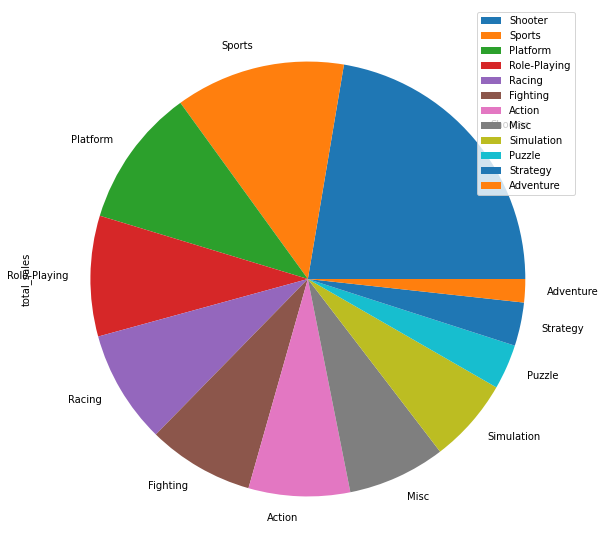

In [48]:
genre_game = actual_data_2013.pivot_table(
    index='genre', values='total_sales',
    aggfunc='mean').sort_values(
    ascending=False, by='total_sales')

display(genre_game)

genre_game.plot(
    kind='pie', figsize=(10,10), y='total_sales');

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


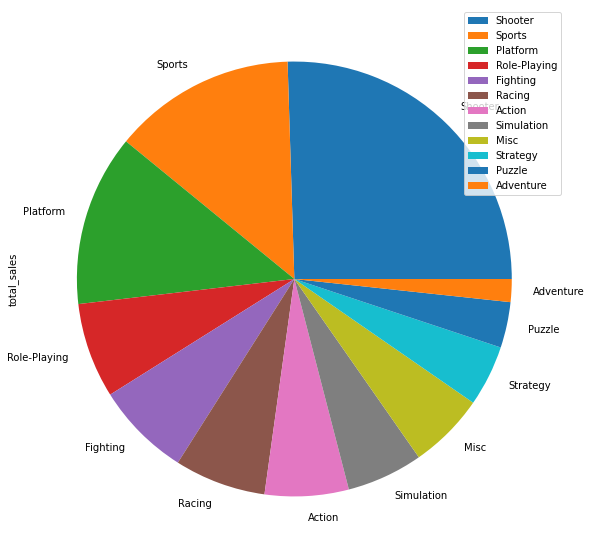

In [49]:
genre_game = actual_data_2013.pivot_table(
    index='genre', values='total_sales',
    aggfunc='median').sort_values(
    ascending=False, by='total_sales')

display(genre_game)

genre_game.plot(
    kind='pie', figsize=(10,10), y='total_sales');

По среднему и медианному значению самые прибыльные жанры Shooter, Sports, Platfrom. Самые низкие продажи у жанра Adventure.

**Вывод.** До 1995 года выпускалось совсем мало игр. Далее игр выпускают с каждым годом все больше, пик приходится на 2008-2009 год, затем спад почти в 2 раза, начиная с 2012 года. Каждая платформа популярна примерно 10 лет. Пик популярности наступает через 5 лет после выхода платформы, далее наблюдается спад. В период с 2005 по 2015 появилось сразу 4 платформы, пик популярности которых приходился на период с 2008 по 2013 года. Начиная с 2013 года практически все платформы падают в продажах, некоторые их них не приносят прибыль совсем. Есть только 2 платформы, которые потенциально могут принести прибыль, это платформы PS4 и XOne. По всем платформам есть выбросы по продажам, а также разброс по первому и третьему квартилю. По изученным платформам оценкам пользователей не влияет на продажи. Оценки критиков влияют, но мало. Самые прибыльные жанры Shooter, Sports, Platfrom. Самые низкие продажи у жанра Adventure.

# Шаг 4. Составим портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):

## Самые популярные платформы (топ-5).

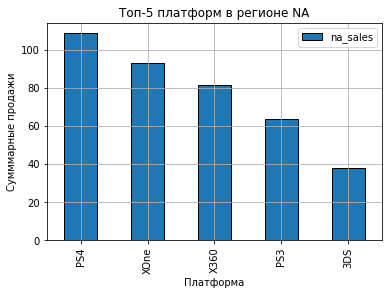

In [50]:
actual_data_2013.groupby(
    by='platform').agg({'na_sales':'sum'}).sort_values(
    by='na_sales', ascending=False).head(5).plot(
    kind='bar', ec='black', grid=True)

plt.title('Топ-5 платформ в регионе NA')
plt.xlabel('Платформа')
plt.ylabel('Сумммарные продажи')
plt.show()

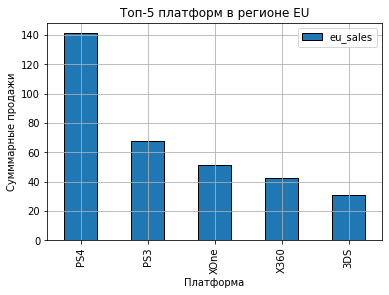

In [51]:
actual_data_2013.groupby(
    by='platform').agg({'eu_sales':'sum'}).sort_values(
    by='eu_sales', ascending=False).head(5).plot(
    kind='bar',ec='black', grid=True)

plt.title('Топ-5 платформ в регионе EU')
plt.xlabel('Платформа')
plt.ylabel('Сумммарные продажи')
plt.show()

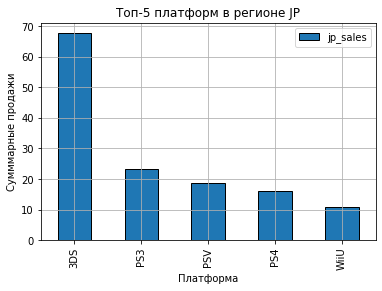

In [52]:
actual_data_2013.groupby(
    by='platform').agg({'jp_sales':'sum'}).sort_values(
    by='jp_sales', ascending=False).head(5).plot(
    kind='bar',ec='black', grid=True)


plt.title('Топ-5 платформ в регионе JP')
plt.xlabel('Платформа')
plt.ylabel('Сумммарные продажи')
plt.show()

Самая популярная платформа во всех регионах разная, X360, PS4, 3DS в регионах Северная Америка,Европа и Япония соответственно, причем платформа 3DS в Японии самая популярная, в то время как в Северной Америке  и Европе платформа находится на 5м месте. Платформа PS4 достаточно популярна как в Северной Америке, так и в Европе. В целом, платформы в Северной Америке  и Европе совпадают, хоть и находятся на разных местах по популярности. В Северной Америке разница в долях продаж всех платформ не так велика друг относильно друга, как например в Японии, где платформа 3DS занимает явное лидирующее место и имеет отрыв в прибыли по отношению в другим 4м платформам.

## Самые популярные жанры (топ-5).

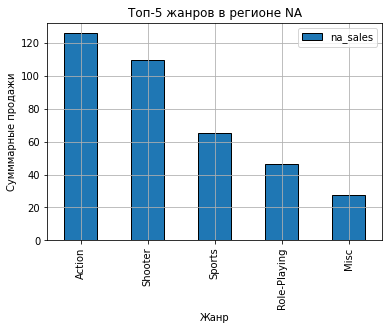

In [53]:
actual_data_2013.groupby(
    by='genre').agg({'na_sales':'sum'}).sort_values(
    by='na_sales', ascending=False).head(5).plot(
    kind='bar', ec='black', grid=True)

plt.title('Топ-5 жанров в регионе NA')
plt.xlabel('Жанр')
plt.ylabel('Сумммарные продажи')
plt.show()

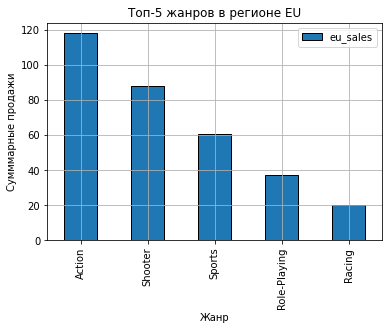

In [54]:
actual_data_2013.groupby(
    by='genre').agg({'eu_sales':'sum'}).sort_values(
    by='eu_sales', ascending=False).head(5).plot(
    kind='bar',ec='black', grid=True)

plt.title('Топ-5 жанров в регионе EU')
plt.xlabel('Жанр')
plt.ylabel('Сумммарные продажи')
plt.show()

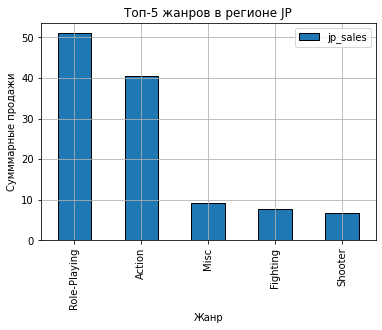

In [55]:
actual_data_2013.groupby(
    by='genre').agg({'jp_sales':'sum'}).sort_values(
    by='jp_sales', ascending=False).head(5).plot(
    kind='bar',ec='black', grid=True)

plt.title('Топ-5 жанров в регионе JP')
plt.xlabel('Жанр')
plt.ylabel('Сумммарные продажи')
plt.show()

Первые четыре жанра в топ-5 в Северной Америке и Европе одинаковые, самый популярный жанр Action, на втором месте Shooter. При этом в Японии отличаются не только жанры, но и объем продаж. Например жанр Role-Playing самый популярный, в то время как в Северной Америке и Европе он на предпоследнем месте. Популярный для Северной Америки и Европы жанр Shooter отсутствует в топ-5 Японии. 

## Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

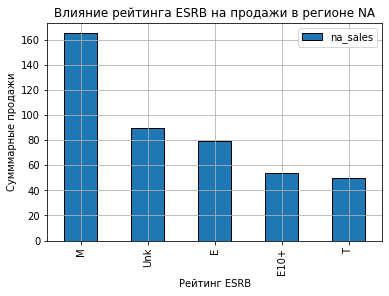

In [56]:
actual_data_2013.groupby(
    by='rating').agg({'na_sales':'sum'}).sort_values(
    by='na_sales', ascending=False).plot(
    kind='bar', ec='black', grid=True)

plt.title('Влияние рейтинга ESRB на продажи в регионе NA')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Сумммарные продажи')
plt.show()

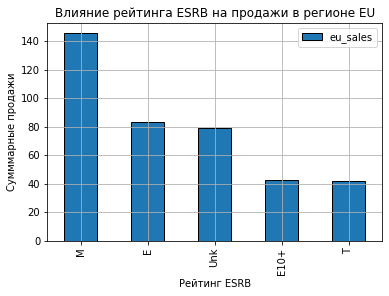

In [57]:
actual_data_2013.groupby(
    by='rating').agg({'eu_sales':'sum'}).sort_values(
    by='eu_sales', ascending=False).plot(
    kind='bar', ec='black', grid=True)

plt.title('Влияние рейтинга ESRB на продажи в регионе EU')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Сумммарные продажи')
plt.show()

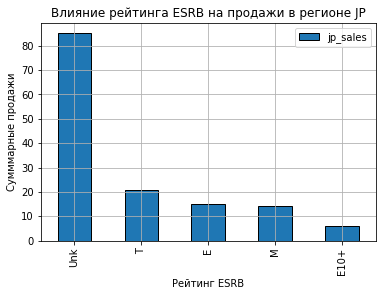

In [58]:
actual_data_2013.groupby(
    by='rating').agg({'jp_sales':'sum'}).sort_values(
    by='jp_sales', ascending=False).plot(
    kind='bar', ec='black', grid=True)

plt.title('Влияние рейтинга ESRB на продажи в регионе JP')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Сумммарные продажи')
plt.show()

В Северной Америке и Европе самый популярный рейтинг М - "для взрослых". Остальные рейтинги почти одинаково популярны в этих двух регионах, а именно, E - "для всех", Unk - игры без рейтинга , E10+ - "для всех от 10 лет и старше",T - "подросткам". 
В Японии лидируют игры без рейтинга ESRB. Возможно в Японии локальные игры не используют систему оценки ESRB, так как ESRB - неправительственная организация, которая занимается регулированием компьютерных игр и их рекламных кампаний, а также обеспечением конфиденциальности в интернете. Деятельность ESRB официально ограничена Канадой, США и Мексикой. Таким образом рейтинг ESRB все же влияет на продажи в В Северной Америке и Европе, но не в Японии.

 **Вывод.** Самые популярные платформы X360, PS4, 3DS в регионах Северная Америка, Европа и Япония соответственно. В целом, платформы в Северной Америке и Европе совпадают, хоть и находятся на разных местах по популярности. Самый популярный жанр в в Северной Америке и Европе Action, на втором месте Shooter. При этом в Японии отличаются не только жанры, но и объем продаж. Жанр Role-Playing самый популярный в Японии. В Северной Америке и Европе самый популярный рейтинг М - "для взрослых". 
В Японии лидируют игры без рейтинга ESRB.

# Шаг 5. Проверим гипотезы.

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем гипотезы:

- Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные

Используем t-критерий Стьюдента для подтверждения гипотезы о равенстве средних двух генеральных совокупностей.

Возьмем пороговое значение p-value = 0.05

In [59]:
xbox_one = actual_data_2013[(actual_data_2013['platform'] == 'XOne') & (actual_data_2013['user_score'] > 0)]['user_score']
pc = actual_data_2013[(actual_data_2013['platform'] == 'PC') & (actual_data_2013['user_score'] > 0)]['user_score']

alpha= 0.05

results = st.ttest_ind(
    xbox_one,
    pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Отвергнуть нулевую гипотезу не удалось, нет достаточного количества данных утверждать, что средние пользовательские рейтинги платформ Xbox One и PC разные.

## Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем гипотезы:

- Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Используем все тот же t-критерий Стьюдента для подтверждения гипотезы о равенстве средних двух генеральных совокупностей.

Пороговое значение p-value = 0.05

In [60]:
genre_action = actual_data_2013[(actual_data_2013['genre'] == 'Action') & (actual_data_2013['user_score'] > 0)]['user_score']
genre_sports = actual_data_2013[(actual_data_2013['genre'] == 'Sports') & (actual_data_2013['user_score'] > 0)]['user_score']

alpha= 0.05

results = st.ttest_ind(
    genre_action,
    genre_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


У нас есть основания утверждать, средние пользовательские рейтинги жанров Action и Sports разные.

**Вывод.** Проверили гипотезы, в результате которых получили:
- отвергнуть нулевую гипотезу не удалось, нет достаточного количества данных утверждать, что средние пользовательские рейтинги платформ Xbox One и PC разные
- есть основания утверждать, средние пользовательские рейтинги жанров Action и Sports разные.

# Общий вывод.

Всего в датафрейме 16715 строк. Были пропуски в нескольких столбцах. Необходимо было изменить тип данных в столбце Year_of_Release и User_Score, поменять регистр названий столбцов.

**Подготовили данные:**

- заменили названия столбцов (привели к нижнему регистру)
- обработали пропуски и изменили тип данных в в столбцах Year_of_Release и User_Score 
- удалили неявный дубликат

**Провели исследовательский анализ данных:**

- проверили, сколько игр выпускалось в разные годы: оказалось, что совсем мало игр выпускалось вплоть до 1995 года. Далее игр выпускали с каждым годом все больше, пик приходится на 2008-2009 год, затем спад почти в 2 раза, начиная с 2012 года.

- посмотрели, как менялись продажи по платформам: самыми популярными по суммарных продажам оказались 6 платформ: PS2, X360, PS3, Wii, DS, PS. Каждая платформа популярна примерно 10 лет. Пик популярности наступает через 5 лет после выхода платформы, далее наблюдается спад, так как пользователи, вероятно, переходят на новую, более совершенную платформу. 

- провели анализ за актуальный период, начиная с 2013 года: самыми прибыльными платформами были PS4, PS3, X360. Практически все платформы падают в продажах, некоторые их них не приносят прибыль совсем. Есть только 2 платформы, которые потенциально могут принести прибыль, несмотря на то, что пик продаж уже был. Это платформы PS4 и XOne.

- построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам: по всем платформам есть выбросы по продажам, а также разброс по первому и третьему квартилю.

- проверили, как влияют на продажи платформ отзывы пользователей и критиков: оценка пользователей не влияет на продажи,  оценка критиков влияет, но совсем слабо.

- посмотрели на общее распределение игр по жанрам: самые прибыльные жанры Shooter, Sports, Platfrom. Самые низкие продажи у  жанра Adventure.

**Составили портрет пользователя каждого региона:**

Определили для пользователя каждого региона (NA, EU, JP):

- самые популярные платформы (топ-5):самая популярная платформа во всех регионах разная, X360, PS4, 3DS в регионах Северная Америка,Европа и Япония соответственно, причем платформа 3DS в Японии самая популярная, в то время как в Северной Америке и Европе платформа закрывает топ-5, находится на 5м месте. Платформа PS4 достаточно популярна как в Северной Америке, так и в Европе. В целом, платформы в Северной Америке и Европе совпадают, хоть и находятся на разных местах по популярности. В Северной Америке разница в долях продаж всех платформ не так велика друг относильно друга, как например в Японии, где платформа 3DS занимает явное лидирующее место и имеет отрыв в прибыли по отношению в другим 4м платформам.

- самые популярные жанры (топ-5): самый популярный жанр Action, на втором месте Shooter в Северной Америке и Европе. При этом в Японии отличаются не только жанры, но и объем продаж. Например жанр Role-Playing самый популярный, в то время как в Северной Америке и Европе он на предпоследнем месте. Популярный для Северной Америки и Европы жанр Shooter отсутствует в топ-5 Японии.

- проверили, влияет ли рейтинг ESRB на продажи в отдельном регионе: в Северной Америке и Европе самый популярный рейтинг М - "для взрослых". В Японии лидируют игры без рейтинга ESRB. Таким образом рейтинг ESRB влияет на продажи в В Северной Америке и Европе, но не в Японии.


**Проверили гипотезы:**

Выяснили:

- отвергнуть нулевую гипотезу не удалось, нет достаточного количества данных утверждать, что средние пользовательские рейтинги платформ Xbox One и PC разные
- есть основания утверждать, средние пользовательские рейтинги жанров Action и Sports разные.

Резюмируя, приходим к вывозу, что для прогноза на 2017 год нужно сосредоточиться на современных платформам PS4, XOne, 3DS(для региона Япония), выбирать наиболее популярные жанры Action, Shooter, Role-Playing. Также обращать внимание на рейтинг ESRB, в частности, самый популярный рейтинг М - "для взрослых, но не забывать, что это относится к регионам Северная Америка и Европа. В Японии данный рейтинг не влияет на продажи.